In [1]:
import rasterio
import rasterio.plot
import numpy as np
import matplotlib.pyplot as plt
import rioxarray as xr
import cv2 as cv
import matplotlib

In [2]:
data_name1 = "test1.tif"
data_name2 = "test2.tif"
data_name3 = "test3.tif"
data_name4 = "test4.tif"
data_name5 = "test5.tif"
data_name6 = "test6.tif"
data_name7 = "test7.tif"
data_name8 = "test8.tif"
data_name9 = "test9.tif"
data_name10 = "test10.tif"
data_name11 = "test11.tif"
data_name12 = "test12.tif"
data_name13 = "test13.tif"


CMAP = 'gray'
matplotlib.rc('image', cmap=CMAP)



tiff1 = rasterio.open(data_name1)
tiff2 = rasterio.open(data_name2)
tiff3 = rasterio.open(data_name3)
tiff4 = rasterio.open(data_name4)
tiff5 = rasterio.open(data_name5)
tiff6 = rasterio.open(data_name6)
tiff7 = rasterio.open(data_name7)
tiff8 = rasterio.open(data_name8)
tiff9 = rasterio.open(data_name9)
tiff10 = rasterio.open(data_name10)
tiff11 = rasterio.open(data_name11)
tiff12 = rasterio.open(data_name12)
tiff13 = rasterio.open(data_name13)






#rasterio.plot.show(tiff1, title = "My Data")
#rasterio.plot.show(tiff2, title = "My Data")

#np.shape(tiff1)


In [3]:
a = tiff1.read(1)
b = tiff2.read(1)
c = tiff3.read(1)
d = tiff4.read(1)
e = tiff5.read(1)
f = tiff6.read(1)
g = tiff7.read(1)
h = tiff8.read(1)
i = tiff9.read(1)
j = tiff10.read(1)
k = tiff11.read(1)
l = tiff12.read(1)
m = tiff13.read(1)



In [4]:


flow1 = cv.calcOpticalFlowFarneback(a, b, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow2 = cv.calcOpticalFlowFarneback(b, c, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)



flow3 = cv.calcOpticalFlowFarneback(c, d, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow4 = cv.calcOpticalFlowFarneback(d, e, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow5 = cv.calcOpticalFlowFarneback(e, f, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow6 = cv.calcOpticalFlowFarneback(f, g, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow7 = cv.calcOpticalFlowFarneback(g, h, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow8 = cv.calcOpticalFlowFarneback(h, i, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow9 = cv.calcOpticalFlowFarneback(i, j, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


flow10 = cv.calcOpticalFlowFarneback(j, k, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


#flow11 = cv.calcOpticalFlowFarneback(k, l, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
#   poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


avg = (flow1 + flow2 + flow3 + flow4 + flow5 + flow6)/6


In [5]:

def plot_flow_vectors(flow):
    # Computes the magnitude and angle of the 2D vectors 
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])

    # Creates an image filled with zero 
    # intensities with the same dimensions  
    # as the frame 
    hsv_shape = a.shape + (3,)
    hsv = np.zeros(shape=hsv_shape, dtype=np.uint8) 

    # Sets image hue according to the optical flow  
    # direction 
    hsv[..., 0] = angle * 180 / np.pi / 2

    # Sets image saturation to maximum 
    hsv[..., 1] = 255

    # Sets image value according to the optical flow 
    # magnitude (normalized) 
    hsv[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    
    # Converts HSV to RGB (BGR) color representation 
    rgb = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    
    fig = plt.figure()
    plt.title('Optical flow field')
    plt.imshow(rgb)


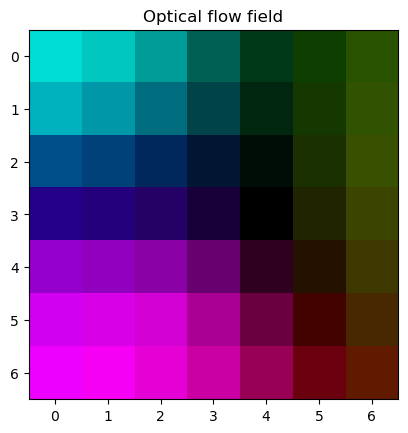

In [6]:

plot_flow_vectors(avg)

In [7]:
def remap_image(image: np.ndarray, flow: np.ndarray) -> np.ndarray:
    """Takes an image and warps it forwards in time according to the flow field.
    
    Args:
        image: The grayscale image to warp.
        flow: A 3D array.  The first two dimensions must be the same size as the first two
            dimensions of the image.  The third dimension represented the x and y displacement.
            
    Returns:  Warped image.
    """
    # Adapted from https://github.com/opencv/opencv/issues/11068
    height, width = flow.shape[:2]
    remap = -flow.copy()
    remap[:,:, 0] += np.arange(width)  # x map
    remap[:,:, 1] += np.arange(height)[:, np.newaxis]  # y map
    return cv.remap(src=image, map1=remap, map2=None, interpolation=cv.INTER_LINEAR, borderMode=cv.BORDER_REPLICATE)

In [8]:
remapped_image = remap_image(g, avg)

In [9]:
print(remapped_image)
print(h)

[[245.5     245.5     245.5     241.84375 234.75    237.89998 237.9    ]
 [245.5     245.5     245.5     242.45312 234.225   237.89998 237.9    ]
 [245.5     244.63751 238.88751 243.81876 255.1     236.3125  236.3125 ]
 [246.17499 245.925   246.05    256.65625 248.46074 229.23438 229.78125]
 [224.      224.      224.      224.15001 224.82832 236.7625  234.04999]
 [224.      224.      224.      224.09999 219.3     232.29999 232.29999]
 [224.      224.      224.      224.125   219.3     232.3     232.3    ]]
[[242.8 242.8 243.8 238.  238.  235.1 235.1]
 [226.2 218.  218.  239.3 244.6 244.6 243.9]
 [224.9 216.4 211.9 211.9 219.4 219.4 223.4]
 [216.4 216.4 211.9 219.4 219.4 214.5 214.5]
 [211.1 228.6 228.6 228.6 214.5 214.5 217. ]
 [217.  224.1 225.8 225.8 225.1 225.1 218. ]
 [217.8 217.8 221.6 226.4 226.4 219.7 219.7]]


In [10]:
print(remapped_image[3,3],h[3,3])

256.65625 219.4


In [11]:
new_flow_1 = cv.calcOpticalFlowFarneback(g, remapped_image, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)


avg = (flow1 + flow2 + flow3 + flow4 + flow5 + flow6 + new_flow_1)/7



remapped_image1 = remap_image(remapped_image, avg)

print(remapped_image1,i)
print(remapped_image1[3,3],i[3,3])

[[245.5     245.5     245.5     245.5     234.84843 237.9     237.9    ]
 [245.5     245.5     245.5     245.5     235.63672 237.9     237.9    ]
 [245.5     245.5     245.5     245.10582 243.66632 237.30469 237.3543 ]
 [224.      224.      224.      224.      238.73457 229.71289 231.41406]
 [224.      224.      224.      224.      224.09903 232.75885 233.50311]
 [224.      224.      224.      224.      224.07422 232.3     232.3    ]
 [224.      224.      224.      224.      224.0625  232.3     232.30002]] [[227.5 227.5 208.8 202.8 202.8 205.4 205.4]
 [228.8 224.7 224.7 201.6 203.7 203.7 204.5]
 [211.6 227.8 207.5 207.5 203.8 203.8 201.1]
 [227.8 227.8 207.5 203.8 203.8 206.5 206.5]
 [227.6 216.4 216.4 204.5 206.5 206.5 202.1]
 [225.4 225.4 206.  206.  203.  203.  224.7]
 [202.2 202.2 205.2 202.8 202.8 224.7 224.7]]
224.0 203.8


In [12]:
new_flow_2 = cv.calcOpticalFlowFarneback(remapped_image, remapped_image1, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)




avg = (flow1 + flow2 + flow3 + flow4 + flow5 + flow6 + new_flow_1 + new_flow_2)/8


remapped_image2 = remap_image(remapped_image1, avg)

print(remapped_image2,j)
print(remapped_image2[3,3],j[3,3])

[[245.5     245.5     245.5     245.5     235.13452 237.9     237.9    ]
 [245.5     245.5     245.5     245.5     235.18129 237.9     237.9    ]
 [245.5     245.5     245.5     245.5     241.80482 237.61008 237.62714]
 [224.      224.      224.      224.      226.23509 231.28818 232.34222]
 [224.      224.      224.      224.      224.      232.46017 233.08955]
 [224.      224.      224.      224.      224.      232.30002 232.30002]
 [224.      224.      224.      224.      224.      232.30002 232.30002]] [[193.8 193.8 193.9 192.6 192.6 194.6 194.6]
 [208.2 215.3 215.3 191.9 189.  189.  193.9]
 [214.8 218.7 214.2 214.2 207.2 207.2 195.8]
 [218.7 218.7 214.2 207.2 207.2 207.2 207.2]
 [207.3 218.9 218.9 220.2 207.2 207.2 191.5]
 [220.5 221.3 215.4 215.4 217.6 217.6 191.1]
 [215.5 215.5 217.9 194.3 194.3 192.9 192.9]]
224.0 207.2


In [13]:
new_flow_3 = cv.calcOpticalFlowFarneback(remapped_image1, remapped_image2, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=10, 
    poly_n=5, poly_sigma=1.2,flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)



avg1 = (flow1 + flow2 + flow3 + flow4 + flow5 + flow6 + new_flow_1 + new_flow_2 + new_flow_3)/9




remapped_image3 = remap_image(remapped_image2, avg1)

print(remapped_image3,k)
print(remapped_image3[3,3],k[3,3])

[[245.5     245.5     245.5     245.5     235.56664 237.9     237.9    ]
 [245.5     245.5     245.5     245.5     235.22377 237.9     237.9    ]
 [245.5     245.5     245.5     245.5     240.64774 237.74652 237.75504]
 [224.      224.      224.      224.      224.48892 232.13205 233.00284]
 [224.      224.      224.      224.      224.      232.41382 232.84282]
 [224.      224.      224.      224.      224.      232.30002 232.30002]
 [224.      224.      224.      224.      224.      232.30002 232.30002]] [[162.7 162.7 183.2 154.7 154.7 158.5 158.5]
 [169.9 179.4 179.4 152.4 154.6 154.6 145.3]
 [151.9 175.8 183.2 183.2 152.8 152.8 145.3]
 [175.8 175.8 183.2 152.8 152.8 151.5 151.5]
 [175.4 164.9 164.9 161.9 151.5 151.5 139.4]
 [181.3 189.  181.5 181.5 163.1 163.1 141.1]
 [188.4 188.4 188.4 166.3 166.3 151.5 151.5]]
224.0 152.8
